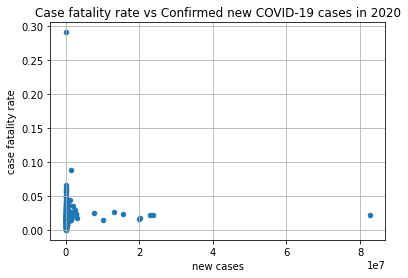

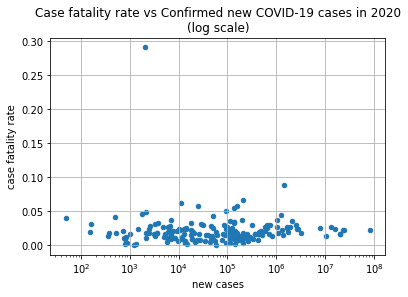

,location,total_cases,new_cases,total_deaths,new_deaths,case_fatality_rate
197,Yemen,2099.0,2099.0,610.0,610.0,0.290615


,location,total_cases,new_cases,total_deaths,new_deaths,case_fatality_rate
196,World,83521859.0,82698077.0,1824406.0,1824389.0,0.022061


In [1]:
import pandas as pd
import argparse
import matplotlib.pyplot as plt

# handle command line input
parser = argparse.ArgumentParser()
#parser.add_argument('pngname1', type=str)
#parser.add_argument('pngname2', type=str)
#args = parser.parse_args()

## 1

# load the dataframe from part A1
monthlycovid2020 = pd.read_csv("owid-covid-data-2020-monthly.csv")

# group the data further into the 2020 annual data for each location
covid2020 = monthlycovid2020.groupby('location', as_index = False).aggregate({'total_cases': max, 'new_cases': lambda x: x.sum(min_count=1), 
                                                                                         'total_deaths': max, 'new_deaths': lambda x: x.sum(min_count=1)})
# calculate the annual case_fatality_rate 
covid2020['case_fatality_rate'] = covid2020['new_deaths'] / covid2020['new_cases']

# plot a scatter plot comparing case fatality rate vs the confirmed new cases in 2020 for each location
plt.scatter(covid2020['new_cases'], covid2020['case_fatality_rate'], s=20)
plt.ylabel("case fatality rate")
plt.xlabel("new cases")
plt.title("Case fatality rate vs Confirmed new COVID-19 cases in 2020")
plt.grid(True)
plt.show()

# save the plot as a png file using the input from the command line
#plt.savefig(args.pngname1)

## 2

# plot the same scatter plot but this time using a log scale on the x axis
plt.scatter(covid2020['new_cases'], covid2020['case_fatality_rate'], s=20)
plt.xscale('log')
plt.ylabel("case fatality rate")
plt.xlabel("new cases")
plt.title("Case fatality rate vs Confirmed new COVID-19 cases in 2020\n(log scale)")
plt.grid(True)  
plt.show()

display(covid2020.loc[covid2020['case_fatality_rate']==covid2020['case_fatality_rate'].max()])
display(covid2020.loc[covid2020['new_cases']==covid2020['new_cases'].max()])

# save the plot as a png file using the input from the command line
#plt.savefig(args.pngname2)